# Lab7
Team members: Jonathan Mejia, Rongwei Ji, Xiaoqing Zou

## Data Source

Data Source: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification


Description: This is the classification based E-commerce text dataset for 4 categories - "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

The dataset is in ".csv" format with two columns - the first column is the class name and the second one is the datapoint of that class. The data point is the product and description from the e-commerce website.

The dataset has the following features :

Data Set Characteristics: Multivariate

Number of Instances: 50425

Number of classes: 4

## 1 Preparation

### 1.1 Variable representations

Before we start our model training, we could review what the data looks like and define some metrics for our modeling.

       Class                                               Text
0  Household  Paper Plane Design Framed Wall Hanging Motivat...
1  Household  SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2  Household  SAF 'UV Textured Modern Art Print Framed' Pain...
3  Household  SAF Flower Print Framed Painting (Synthetic, 1...
4  Household  Incredible Gifts India Wooden Happy Birthday U...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   50425 non-null  object
 1   Text    50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB
None
            Class                                               Text
count       50425                                              50424
unique          4                                              27802
top     Household  Think & Grow Rich About the Author NAPOLEON HI...
freq        19313                        

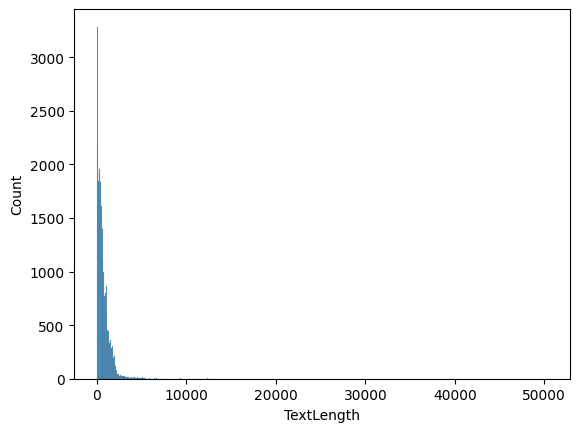

In [12]:
# Load the data and show the general situation of data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ecommerceDataset.csv')
print(df.head())
print(df.info())
print(df.describe())

# check each row of df['Text'] check the type of data whether it is string or not
print(df['Text'].apply(type).value_counts())

# find one row of df['Text'] that is not string, convert each row df['Text'] to string
df['Text'] = df['Text'].apply(lambda x: str(x))
print(df['Text'].apply(type).value_counts())

# show the distribution of length of each row of df['Text']
df['TextLength'] = df['Text'].apply(len)
print(df['TextLength'].describe())
sns.histplot(df['TextLength'])
plt.show()


Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: Class, dtype: int64


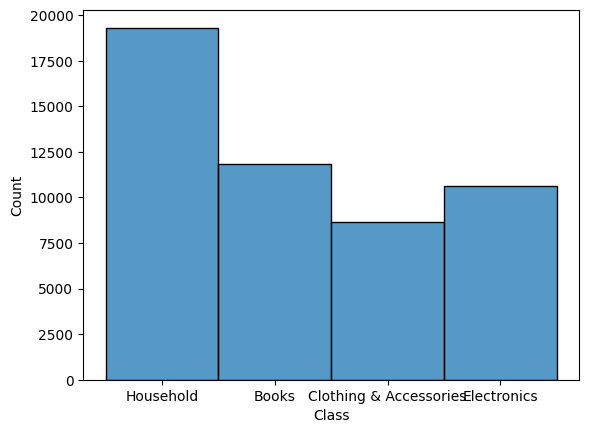

In [13]:
# show the length distribution of each label
print(df['Class'].value_counts())
sns.histplot(df['Class'])
plt.show()


Class
Books                     495.0
Clothing & Accessories    342.0
Electronics               630.0
Household                 515.0
Name: TextLength, dtype: float64
0.25    456.75
0.75    543.75
Name: TextLength, dtype: float64


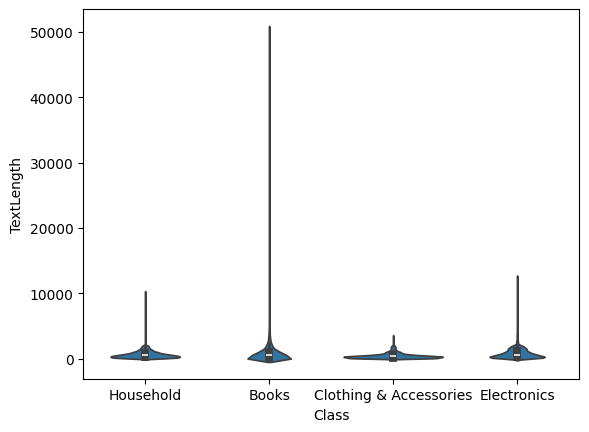

In [14]:
# add a normal distribution of length of each row of df['Text'] to df
# show the violin plot of the length of each row of df['Text'] with the label of df['Class']
# for 4 classes in one plot with different violin plot with the median of length of each class in the plot
# show the number of the median of length of each class in the plot

df['NormalLength'] = np.random.normal(df['TextLength'].mean(), df['TextLength'].std(), df['TextLength'].shape)
sns.violinplot(x='Class', y='TextLength', data=df)

# print the median of length of each class with the label of df['Class']
print(df.groupby('Class')['TextLength'].median())

# print the uper and lower bound of the median of length of each class
print(df.groupby('Class')['TextLength'].median().quantile([0.25, 0.75]))

After review the dataset and distribution. we decide  word embedding to convert text data to numerical data

### Tokenization and force a specific length of sequence

We both consider the imblance and the distribution of the datasets.
- `max_sequence_length` is 500
- we use the `tokenizer` as Converts text into sequences of integers. Each integer represents a unique word in the dataset, forming a mapping from words to integers based on their occurrence in the dataset.



In [17]:
# using from tensorflow.keras.layers import Embedding  for the embedding layer of the model.
# using word embedding for the proper variable representations of the text data.
# mapping the words to the vectors of real numbers.

from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# for better performance of model , we can define the specifi sequence length of the text data
# based on the distribution of the length of the text data, we decide the sequence length of the text data is 500
# we can use the padding to make the length of the text data to the same length
max_sequence_length = 500
top_words = 10000

# using the tokenizer to convert the text data to the sequence of the integer
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(df['Text'])
sequence = tokenizer.texts_to_sequences(df['Text'])
padded = pad_sequences(sequence, padding='post', maxlen=max_sequence_length)


# show the final shape of data which would using for the model
print(padded.shape)
# describe the final shape of data
print(pd.DataFrame(padded).describe())






# embedding and modle samples
# using the embedding layer to convert the sequence of the integer to the sequence of the vector
model = Sequential()

model.add(Embedding(len(tokenizer.word_index)+1, 32))  # tensorflow 2.16.1 update the input_length is deprecated # if you are in 2.15.0 it's necessary to add input_length
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()







(50425, 500)
                0             1             2             3             4    \
count  50425.000000  50425.000000  50425.000000  50425.000000  50425.000000   
mean    2618.805354   1796.099613   1524.638116   1484.793694   1342.310283   
std     2769.681016   2357.618016   2097.256738   2042.060435   1966.266613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      339.000000    158.000000    131.000000    120.000000     88.000000   
50%     1501.000000    682.000000    580.000000    597.000000    504.000000   
75%     4238.000000   2497.000000   2036.000000   2004.000000   1646.000000   
max     9999.000000   9988.000000   9997.000000   9988.000000   9994.000000   

                5             6             7             8             9    \
count  50425.000000  50425.000000  50425.000000  50425.000000  50425.000000   
mean    1241.237819   1178.108637   1158.881864   1080.297015   1051.728468   
std     1909.076441   1889.806237   18

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

The Tokenizer object is created with default parameters. This class provides comprehensive options for configuring how text is tokenized:

- num_words: Limits the vocabulary size to the top num_words based on frequency. This parameter is not specified in your code, so it defaults to None, which includes all unique words.
- filters: A string where each element is a character that will be filtered from the texts. The default is all punctuation, plus tabs and line breaks, minus the ' character.
- lower: Converts text to lowercase by default.
split: Defines the delimiter to split on, which is ' ' (space) by default.
- char_level: If set to True, every character will be treated as a token. In your code, this is left as False, so tokenization occurs at the word level.
- oov_token: A token to replace out-of-vocabulary words during text_to_sequence calls, not used in your script.

## 1.2 Mertic

Recall

Using recall as an evaluation metric is particularly appropriate for your imbalanced dataset because it emphasizes the model's ability to identify all relevant instances of each class, including the minority ones. Recall measures the percentage of actual positives that are correctly identified, making it indispensable when the cost of missing a positive instance is high. In scenarios like yours, where missing a classification could mean overlooking critical issues or valuable insights, ensuring a high recall means that the model is effectively capturing these important but less frequent instances, thereby enhancing its utility and reliability in real-world applications.

## 1.3 Divide data

For managing an imbalanced dataset in dividing it into training and testing sets, an effective approach is stratified k-fold cross-validation. This technique enhances the robustness of your model by ensuring that each fold of the data contains approximately the same percentage of samples of each target class as the complete set.  This method maximizes the use of available data for training while ensuring that the model is tested against well-rounded and representative test sets, leading to more reliable and consistent performance metrics.

For this dataset we use 5-fold cross validation. Because the 10 may spend more time to training, we decide the 5-fold

# Modeling

Two different sequential network architectures

## Model 1 with Adam hyper-parameter


In [18]:
# data for traing model
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

classe=df['Class'].values

le = LabelEncoder()
classe = le.fit_transform(df['Class'].values)

# classe as one hot
from tensorflow.keras.utils import to_categorical
classe = to_categorical(classe)

X_train, X_test, y_train, y_test = train_test_split(padded, classe, test_size=0.2, random_state=42)

print("Training Data Shape: ", X_train.shape)
print("Testing Data Shape: ", X_test.shape)
print("Training Labels Shape: ", y_train.shape)
print("Testing Labels Shape: ", y_test.shape)

Training Data Shape:  (40340, 500)
Testing Data Shape:  (10085, 500)
Training Labels Shape:  (40340, 4)
Testing Labels Shape:  (10085, 4)


In [ ]:
# check the ternsoflow version
tf.__version__


In [23]:
# Model 1
# beased on the lecture code

# this is pure CNN model



from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer,Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Embedding, Input, Concatenate
from tensorflow.keras.layers import Subtract
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import KFold
import tensorflow as tf


# Custom Layer for Squaring
class SquareLayer(Layer):
    def call(self, inputs):
        return tf.square(inputs)

# Constants
EMBED_SIZE = 50
NUM_CLASSES = 4  # Adjust according to your problem
top_words = 10000  # Number of words in the vocabulary
max_review_length = 500  # Maximum number of words in a review/input sequence

# Model Definition (wrapped inside a function for reusability)
def create_model(input_shape):
    sequence_input = Input(shape=(input_shape, ))
    embedded_sequences = Embedding(top_words, EMBED_SIZE)(sequence_input)
    x = Conv1D(64, 5, activation='relu', kernel_initializer='he_uniform')(embedded_sequences)
    x = MaxPooling1D(5)(x)
    x = Dropout(0.2)(x)
    x = Conv1D(64, 5, activation='relu', kernel_initializer='he_uniform')(x)
    x = MaxPooling1D(5)(x)
    x = Dropout(0.2)(x)
    x = Conv1D(64, 5, activation='relu', kernel_initializer='he_uniform')(x)
    x = Dropout(0.2)(x)
    x_mean = GlobalAveragePooling1D()(x)
    x_tmp = Subtract()([x, x_mean])
    x_squared = SquareLayer()(x_tmp)
    x_std = GlobalAveragePooling1D()(x_squared)
    x = Concatenate(name='concat_1')([x_mean, x_std])
    x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
    x = Dropout(0.2)(x)
    preds = Dense(NUM_CLASSES, activation='sigmoid')(x)
    model = Model(sequence_input, preds)
    return model





In [26]:
# Data Preparation
# Adjust the dimensions of X_train as necessary; it should be a 2D array
kf = KFold(n_splits=5)

results = []
fold_index = 0

for train_index, test_index in kf.split(X_train):
    fold_index += 1
    print(f"Training fold {fold_index}")

    # Split data into training and testing sets for this fold
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    print(X_train_fold.shape)
    print(X_test_fold.shape)
    print(y_train_fold.shape)
    print(y_test_fold.shape)

    # Create a new model instance
    model = create_model(X_train.shape[1])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall', 'accuracy'])

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold))

    # Evaluate the model
    scores = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    print(f"Accuracy for fold {fold_index}: {scores[1] * 100}%")
    results.append(scores[1])

# Average and display the results
average_accuracy = np.mean(results)
print(f"Average Accuracy: {average_accuracy * 100}%")


# show the sumarry of model here
model.summary()

Training fold 1
(32272, 500)
(8068, 500)
(32272, 4)
(8068, 4)
Epoch 1/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6136 - loss: 0.3784 - recall: 0.4474 - val_accuracy: 0.9481 - val_loss: 0.0885 - val_recall: 0.9427
Epoch 2/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9648 - loss: 0.0643 - recall: 0.9604 - val_accuracy: 0.9611 - val_loss: 0.0656 - val_recall: 0.9588
Epoch 3/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9827 - loss: 0.0321 - recall: 0.9804 - val_accuracy: 0.9654 - val_loss: 0.0578 - val_recall: 0.9636
Epoch 4/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9898 - loss: 0.0192 - recall: 0.9891 - val_accuracy: 0.9685 - val_loss: 0.0673 - val_recall: 0.9679
Epoch 5/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9917 - loss: 0.0145 - recall: 0.9913 - val_accuracy: 0.9706 - val_loss: 0.0695 - val_recall: 0.9690
Epoch 6/10
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9946 - loss: 0.0096 - recall: 

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 500)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 500, 50)   │    500,000 │ input_layer_12[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_39 (Conv1D)  │ (None, 496, 64)   │     16,064 │ embedding_15[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_27    │ (None, 99, 64)    │          0 │ conv1d_39[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_47          │ (None, 99, 64)    │          0 │ max_pooling1d_27… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_40 (Conv1D)  │ (None, 95, 64)    │     20,544 │ dropout_47[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_28    │ (None, 19, 64)    │          0 │ conv1d_40[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 19, 64)    │          0 │ max_pooling1d_28… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_41 (Conv1D)  │ (None, 15, 64)    │     20,544 │ dropout_48[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_49          │ (None, 15, 64)    │          0 │ conv1d_41[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ dropout_49[0][0]  │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ subtract_12         │ (None, 15, 64)    │          0 │ dropout_49[0][0], │
│ (Subtract)          │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ square_layer_8      │ (None, 15, 64)    │          0 │ subtract_12[0][0] │
│ (SquareLayer)       │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ square_layer_8[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_1            │ (None, 128)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 64)        │      8,256 │ concat_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_50          │ (None, 64)        │          0 │ dense_19[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 4)         │        260 │ dropout_50[0][0]  │
└─────────────────────┴───────────────────┴────────────┴─────────────────

 Total params: 1,697,006 (6.47 MB)

 Trainable params: 565,668 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,131,338 (4.32 MB)

You must install pydot (`pip install pydot`) for `plot_model` to work.
[0.7892600297927856, 0.9709035754203796, 0.9831122756004333, 0.989216685295105, 0.99228435754776, 0.993988573551178, 0.9951041340827942, 0.9957858324050903, 0.996126651763916, 0.9966224431991577]
[0.6868183016777039, 0.9669063091278076, 0.9819347858428955, 0.9885659217834473, 0.9919744729995728, 0.9936787486076355, 0.9950421452522278, 0.9954759478569031, 0.9959717392921448, 0.9963745474815369]


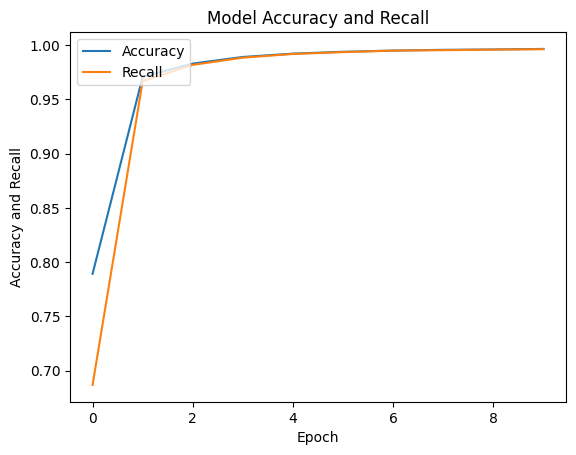

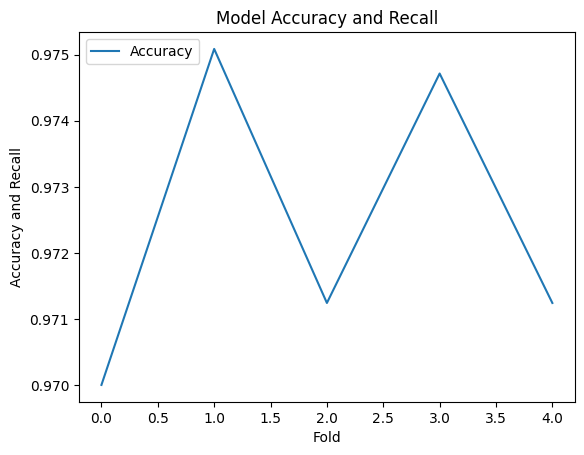

In [27]:
# show the plot of model here
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# show accuracy and recall of the model after 5-fold cross validation, which is one of the fold
print(history.history['accuracy'])
print(history.history['recall'])

# show the plot of accuracy and recall of the model after 5-fold cross validation, which is one of the fold
plt.plot(history.history['accuracy'])
plt.plot(history.history['recall'])
plt.title('Model Accuracy and Recall')
plt.ylabel('Accuracy and Recall')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Recall'], loc='upper left')
plt.show()

# results[] is the list of score of each fold contain the accuracy and recall of the model of each fold.
# draw plot of the accuracy and recall of the model after 10-fold cross validation

plt.plot(results)
plt.title('Model Accuracy and Recall')
plt.ylabel('Accuracy and Recall')
plt.xlabel('Fold')
plt.legend(['Accuracy', 'Recall'], loc='upper left')
plt.show()



Epoch 1/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.6657 - loss: 0.3484 - recall: 0.5047 - val_accuracy: 0.9507 - val_loss: 0.0834 - val_recall: 0.9455
Epoch 2/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9709 - loss: 0.0540 - recall: 0.9686 - val_accuracy: 0.9707 - val_loss: 0.0540 - val_recall: 0.9682
Epoch 3/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9842 - loss: 0.0294 - recall: 0.9830 - val_accuracy: 0.9744 - val_loss: 0.0535 - val_recall: 0.9731
Epoch 4/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9903 - loss: 0.0179 - recall: 0.9898 - val_accuracy: 0.9758 - val_loss: 0.0621 - val_recall: 0.9748
Epoch 5/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9939 - loss: 0.0118 - recall: 0.9931 - val_accuracy: 0.9759 - val_loss: 0.0668 - val_recall: 0.9754
Epoch 6/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9953 - loss: 0.0088 - recall: 0.9954 - val_accuracy: 0.9765 - val_loss: 0.0671 -

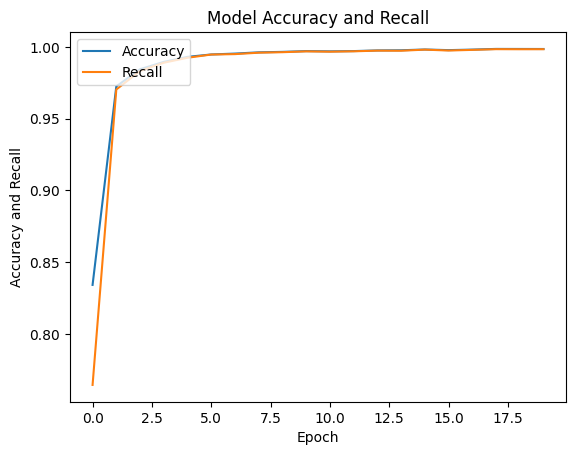

In [28]:
# tran the model with the whole training data and test the model with the testing data
# ADAM optimizer is used for the model
model_1 = create_model(X_train.shape[1])
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['recall', 'accuracy'])
history_1 = model_1.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
scores_1 = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy for the model: {scores_1[1] * 100}%")
print(f"Recall for the model: {scores_1[2] * 100}%")

# show the epoch adn recall of the model at plot
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['recall'])
plt.title('Model Accuracy and Recall')
plt.ylabel('Accuracy and Recall')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Recall'], loc='upper left')
plt.show()


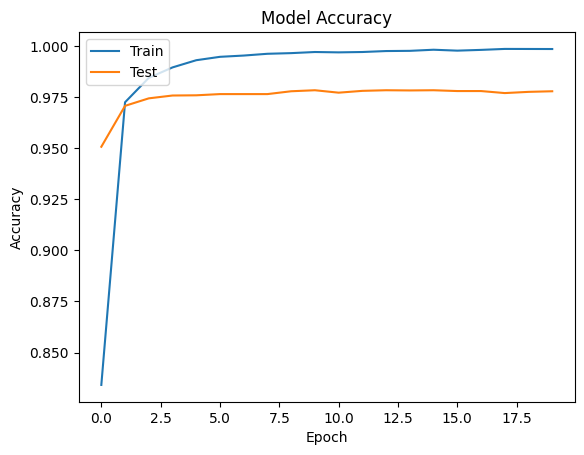

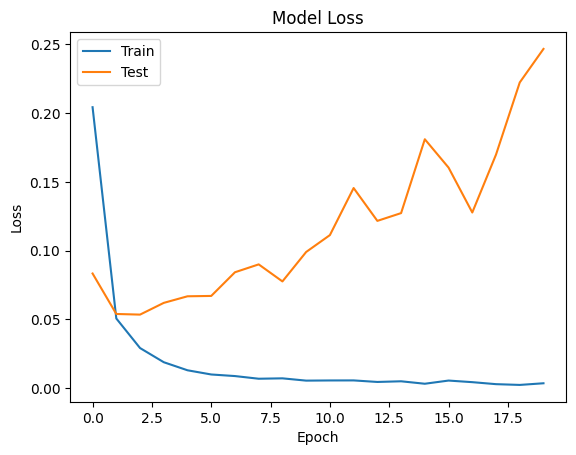

In [30]:
# show the plot of train and test of model performance
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# also show the plot of train and test model loss 
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Model 1 with SGD hyper-parameter

Epoch 1/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2991 - loss: 0.5942 - recall: 0.0393 - val_accuracy: 0.3854 - val_loss: 0.5491 - val_recall: 0.0000e+00
Epoch 2/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3848 - loss: 0.5487 - recall: 0.0013 - val_accuracy: 0.3854 - val_loss: 0.5483 - val_recall: 0.0000e+00
Epoch 3/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3813 - loss: 0.5480 - recall: 6.8819e-04 - val_accuracy: 0.3854 - val_loss: 0.5476 - val_recall: 0.0000e+00
Epoch 4/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3865 - loss: 0.5452 - recall: 3.7148e-04 - val_accuracy: 0.3854 - val_loss: 0.5457 - val_recall: 0.0000e+00
Epoch 5/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3823 - loss: 0.5453 - recall: 2.3597e-04 - val_accuracy: 0.3859 - val_loss: 0.5446 - val_recall: 0.0000e+00
Epoch 6/20
1261/1261 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.3855 - loss: 0.5433 - recall: 3.1443e-04 - val_accurac

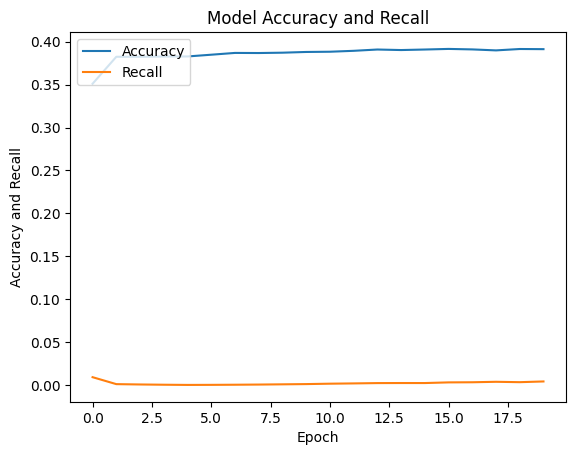

In [31]:
# another optimizer is used for the model: SGD
model_1_SGD = create_model(X_train.shape[1])
model_1_SGD.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['recall', 'accuracy'])
history_1_SGD = model_1_SGD.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
scores_1_SGD = model_1_SGD.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy for the model: {scores_1_SGD[1] * 100}%")
print(f"Recall for the model: {scores_1_SGD[2] * 100}%")


# show the epoch adn recall of the model at plot
plt.plot(history_1_SGD.history['accuracy'])
plt.plot(history_1_SGD.history['recall'])
plt.title('Model Accuracy and Recall')
plt.ylabel('Accuracy and Recall')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Recall'], loc='upper left')
plt.show()


# show the plot of train and test of model recall and loss of the model

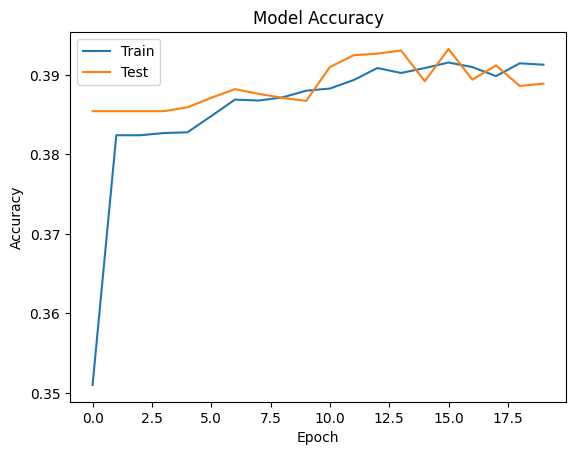

In [32]:
# plot the train and test of model recall 
plt.plot(history_1_SGD.history['accuracy'])
plt.plot(history_1_SGD.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Model2 : Transformer 

In [54]:
# Model 2 : Transfermer model with the pre-trained model

# build a transfermo model architecture to deal with the text data with 4 classes 

from transformers import TFBertModel, BertTokenizer
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Constants
def create_model_tf2():
    input_ids = Input(shape=(max_sequence_length,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(max_sequence_length,), dtype=tf.int32, name="attention_mask")
    bert = TFBertModel.from_pretrained("bert-base-uncased")
    bert.trainable = False
    output = bert(input_ids, attention_mask=attention_mask)
    output = output[1]
    output = Dropout(0.2)(output)
    output = Dense(4, activation='softmax')(output)
    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model



In [55]:
# already split the data into training and testing sets
# train the model with the training data

model_2 = create_model_tf2()
model_2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit([X_train, X_train], y_train, epochs=10, batch_size=32, validation_data=([X_test, X_test], y_test))
scores_2 = model_2.evaluate([X_test, X_test], y_test, verbose=0)
print(f"Accuracy for the model: {scores_2[1] * 100}%")





TypeError: 'NoneType' object is not callable